In [8]:
import pandas as pd
import numpy as np
from GlassBox.figs.figs_utils import FIGSGridSearch
%reload_ext autoreload
%autoreload 2

# Grid-search

In [2]:
FIGS_parameter = dict(
    max_rules= [5,10,15,20,25],
    max_trees=[2,3,4,5,6,7,8,9,10],
    min_impurity_decrease=[0.1, 0.2, 0.3],
)

gs = FIGSGridSearch(path_dataset="../../outputs/scores.csv", random_state=841)
best_ = gs.grid_search(FIGS_parameter)

100%|██████████| 135/135 [07:53<00:00,  3.51s/it, nDCG=0.815]


In [3]:
best_model = best_[0]
print(best_)

(FIGSRegressor(max_rules=25, max_trees=6, min_impurity_decrease=0.1), {'max_rules': 25, 'max_trees': 6, 'min_impurity_decrease': 0.1}, 0.8146798552712963)


# Metric evalutation

In [ ]:
# best_par = {'max_rules': 25, 'max_trees': 6, 'min_impurity_decrease': 0.1}

In [5]:
# nDCG on test-set
nDCG_train = gs.eval_model(model=best_model, df=gs.train)
nDCG_valid = gs.eval_model(model=best_model, df=gs.valid)
nDCG_test = gs.eval_model(model=best_model, df=gs.test)

print("nDCG@15")
print("Training set", round(nDCG_train,4))
print("Validation set", round(nDCG_valid,4))
print("Test set", round(nDCG_test,4))

nDCG@15
Training set 0.8008
Validation set 0.8147
Test set 0.8088


## Example of Job-offer

In [9]:
qId = 1
job_curricula = gs.test[gs.test["qId"] == qId]

y_pred = best_model.predict(np.asarray(job_curricula.iloc[:, 2:13]))

y_pred = pd.DataFrame(y_pred, index=job_curricula.index, columns=["lambdas"])
dt_final = pd.merge(job_curricula, y_pred, left_index=True, right_index=True)

In [16]:
dt_final.sort_values("labels", ascending=False)["labels"].head(15)

990     4
1274    4
915     4
1371    4
1160    4
1373    4
1401    4
906     3
1249    3
1456    3
1086    3
1416    3
1450    3
853     3
887     3
Name: labels, dtype: int64

In [12]:
dt_final.sort_values("lambdas",ascending=False)["labels"].head(15)

968     3
990     4
1271    3
1274    4
920     3
1403    2
1473    3
997     3
1088    3
1121    2
962     2
876     3
1442    2
1165    2
1086    3
Name: labels, dtype: int64

In [29]:
print(best_model)

> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree.
> 	For classifiers, a sigmoid function is then applied to the sum.
> ------------------------------
Skills <= 0.292 (Tree #0 root)
	Experience_abroad <= 0.500 (split)
		Skills <= 0.100 (split)
			SmartWork <= 0.500 (split)
				Val: 0.258 (leaf)
				Val: 0.283 (leaf)
			Val: 0.335 (leaf)
		Val: 0.284 (leaf)
	Skills <= 0.633 (split)
		Skills <= 0.367 (split)
			Val: 0.365 (leaf)
			Val: 0.438 (leaf)
		Val: 0.590 (leaf)

	+
Language <= 0.342 (Tree #1 root)
	Language <= 0.118 (split)
		City <= 0.404 (split)
			Val: -0.030 (leaf)
			Val: -0.019 (leaf)
		Val: 0.018 (leaf)
	Language <= 0.758 (split)
		Val: 0.047 (leaf)
		Val: 0.116 (leaf)

	+
Education <= 0.900 (Tree #2 root)
	Education <= 0.700 (split)
		Education <= 0.500 (split)
			Val: -0.084 (leaf)
			Val: -0.054 (leaf)
		Certificates <= 0.950 (split)
			Val: -0.014 (leaf)
			Val: 0.04

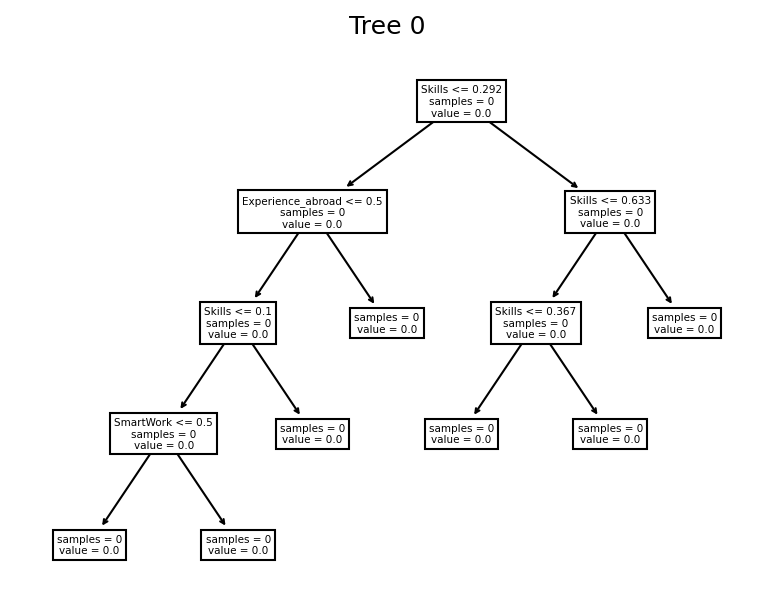

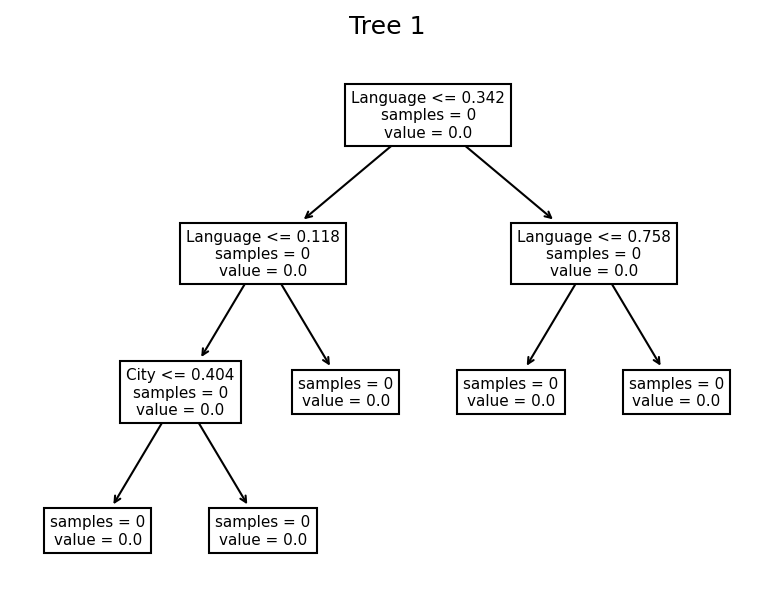

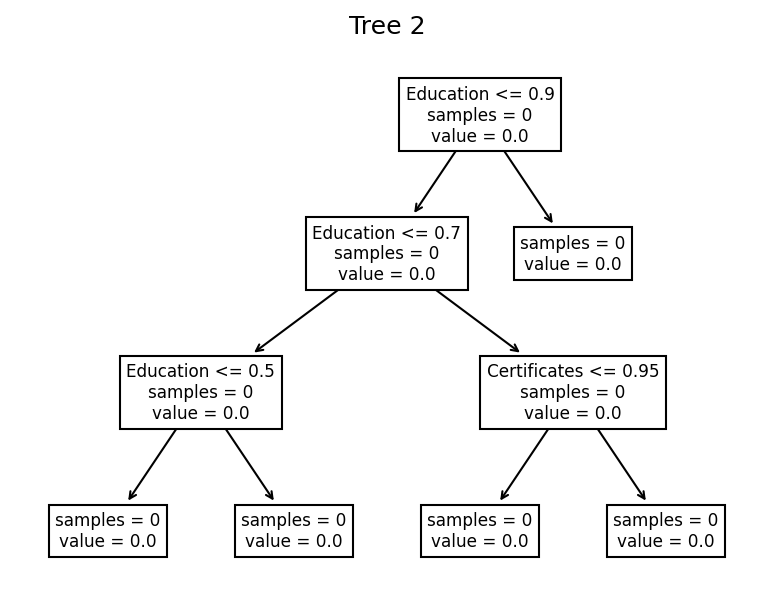

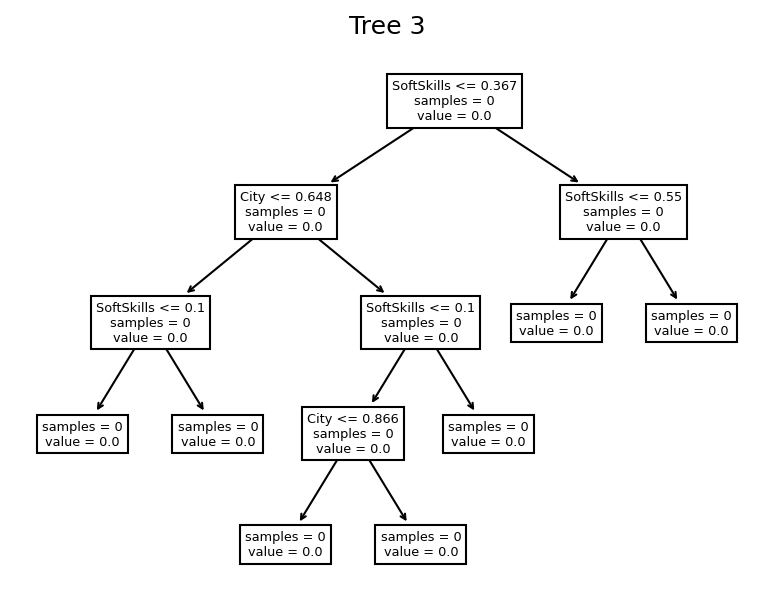

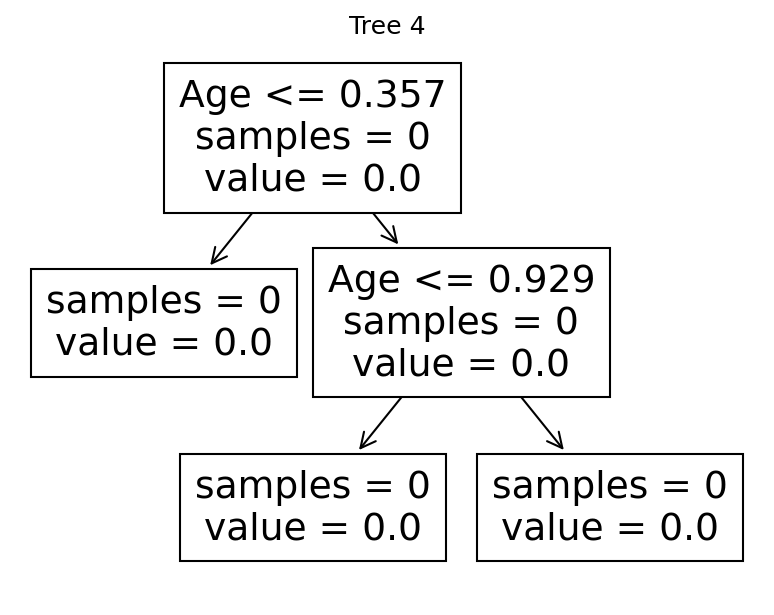

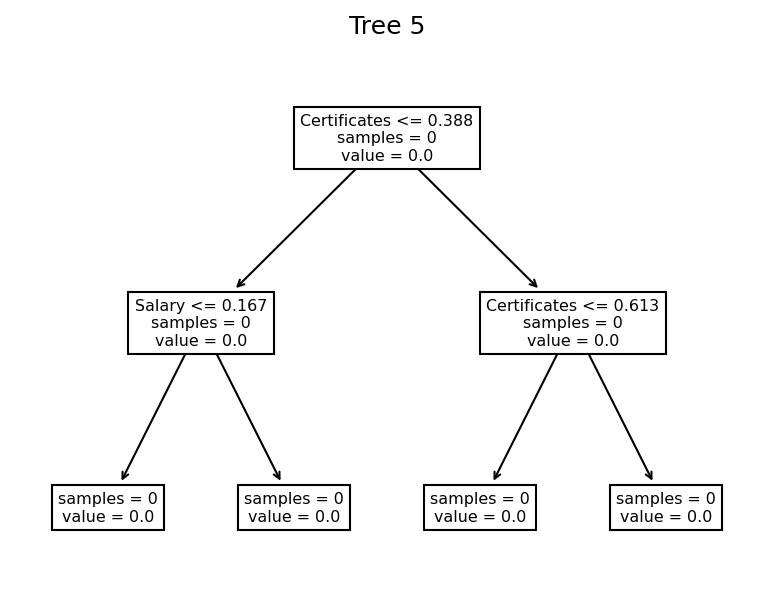

In [28]:
for i in range(len(best_model.trees_)):
    best_model.plot(feature_names=gs.feature_name,  tree_number=i)  